In [19]:
import pandas as pd

In [20]:

df = pd.read_csv('sab-bma.csv')


In [21]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...
1,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCCGTGTATCT...
2,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAACGTCCCACGGCGAGGCACTCTTGGATCCCCCTCCATGAGG...
3,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGCAGCGACGCAAATTGGAGGAGTGCGGCGA...
4,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...
...,...,...
9995,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...
9996,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...,GAAGTTTGGAACGTGTTCGTCCGCCAATAAAAGTTTGCTAGTACAA...
9997,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...,TGCATCCCGGACAACCGCAAGGGGTGTATGGGCACCGCAATTCCCA...
9998,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...


In [22]:
from tqdm import tqdm


In [23]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [24]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [25]:
import difflib


In [26]:
import matplotlib.pyplot as plt
import numpy as np
import os

# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2021basic/bin/universal-darwin'

In [27]:
def print_diff(ref_strand, noisy_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, noisy_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = noisy_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]



100%|██████████| 10000/10000 [00:00<00:00, 95421.81it/s]


[0, 0, 0, 0, 0, 0, 0, 2, 3, 9, 11, 14, 30, 35, 54, 67, 87, 115, 144, 180, 208, 240, 275, 342, 387, 449, 530, 574, 684, 749, 882, 929, 1045, 1111, 1237, 1374, 1492, 1639, 1750, 1932, 2040, 2173, 2322, 2514, 2698, 2885, 3076, 3189, 3379, 3633, 3735, 3956, 4106, 4320, 4426, 4734, 4559, 4423, 4181, 3962, 3820, 3722, 3512, 3295, 3087, 2937, 2718, 2558, 2371, 2263, 2124, 1973, 1865, 1703, 1592, 1460, 1297, 1245, 1072, 986, 900, 804, 724, 629, 568, 484, 406, 367, 283, 239, 215, 170, 125, 102, 92, 64, 51, 32, 32, 26, 16, 12, 9, 3, 0, 1, 0, 0, 0, 0]


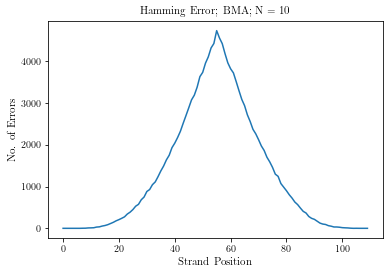

In [28]:
# Hamming Distance Graph
strand_len = 110
count_pos = [0] * (strand_len + 1)

def hamming(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1

for i in tqdm(range(len(ref_strands))):
    hamming(ref_strands[i], noisy_strands[i])

print(count_pos[:-1])
f = plt.figure()
plt.plot(range(strand_len), count_pos[:-1])
plt.title(r'Hamming Error; BMA; N = 10', fontsize=11)
plt.xlabel(r'Strand Position', fontsize=11)
plt.ylabel(r'No. of Errors', fontsize=11)
plt.show()
f.savefig('cov10-sab-bma-hamming.pdf', bbox_inches='tight')

In [29]:
pairs = []
pairs_no_pos = []

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        print_diff(ref_strands[i], noisy_strands[i])


100%|██████████| 10000/10000 [00:09<00:00, 1022.66it/s]


In [30]:

subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)


CT -> GA 6
CC -> AA 6
GC -> AT 6
T -> ACC 6
 -> CACC 6
 -> CGT 6
T -> AACA 6
AGT -> C 6
G -> AAC 6
G -> ATC 6
 -> GAT 6
GA -> CT 6
 -> AGGA 6
CTG -> A 6
TC -> GA 6
T -> CAG 6
TTAG ->  6
TACG ->  6
ACTG ->  6
AT -> GG 6
T -> GAA 6
C -> AAA 6
T -> CCA 6
ATA ->  6
TT -> AG 6
T -> AAC 7
A -> CTC 7
GCC ->  7
TA -> CC 7
CCA ->  7
T -> AAG 7
A -> GCC 7
ACA ->  7
GT -> CC 7
CGG -> A 7
T -> CGG 7
 -> TCC 7
 -> TTC 7
 -> TTA 7
 -> GTT 7
 -> ACT 7
 -> AAAA 7
 -> AAGA 8
TC -> AG 8
AGA ->  8
G -> CAC 8
CGAG ->  8
CA -> G 8
CGC ->  8
CT -> AG 8
C -> AAG 8
C -> AGA 8
A -> GT 8
T -> ACA 8
GTC -> A 8
GG -> T 8
T -> GGA 8
 -> GTC 8
 -> CTT 8
G -> CTC 8
 -> CAG 9
 -> CTA 9
CA -> T 9
 -> TTG 9
G -> ACA 9
TT -> AC 9
TG -> AA 9
TTT ->  9
TG -> CC 9
AA -> T 9
TG -> AC 9
T -> CAC 9
GT -> AA 9
CAA ->  9
CC -> T 10
G -> AAA 10
CTC ->  10
AAG ->  10
CT -> AA 10
AGG ->  10
TAA ->  10
GAA ->  10
 -> TTT 10
 -> AGG 10
 -> GCT 10
 -> GTA 10
CG -> AA 10
T -> GAG 10
 -> TCA 10
T -> AAA 10
C -> TT 10
A -> CT 11
GAG -> 

CG ->  @ 45 6
T -> A @ 85 6
G -> C @ 31 6
 -> T @ 81 6
C -> T @ 36 6
TG ->  @ 58 6
TG ->  @ 46 6
TG ->  @ 40 6
 -> AG @ 59 6
TG ->  @ 49 6
A -> C @ 61 6
A -> C @ 64 6
A -> G @ 40 6
TG ->  @ 56 6
 -> C @ 84 6
TG ->  @ 67 6
C ->  @ 90 6
C -> AA @ 56 6
G -> C @ 74 6
CG ->  @ 63 6
CG ->  @ 62 6
TT -> A @ 55 6
GA ->  @ 63 6
TA ->  @ 64 6
 -> TG @ 53 6
CG ->  @ 75 6
TA ->  @ 62 6
GA ->  @ 58 6
C -> A @ 79 6
GA ->  @ 55 6
TA ->  @ 44 6
A -> C @ 45 6
 -> TG @ 59 6
GA ->  @ 49 6
AT ->  @ 45 6
TA ->  @ 53 6
 -> A @ 28 6
G -> C @ 76 6
T ->  @ 16 6
 -> T @ 24 6
TG ->  @ 69 6
C -> T @ 44 6
 -> G @ 19 6
G -> C @ 33 6
CA ->  @ 57 6
 -> G @ 24 6
C ->  @ 85 6
 -> T @ 35 6
G -> C @ 37 6
 -> AGA @ 53 6
A -> C @ 49 6
AT ->  @ 48 6
 -> C @ 83 6
C ->  @ 17 6
TA ->  @ 55 6
 -> A @ 84 6
 -> C @ 87 6
 -> T @ 30 6
 -> CA @ 62 6
CG ->  @ 54 6
 -> T @ 29 6
 -> CG @ 53 6
G -> T @ 71 6
 -> C @ 21 6
G -> T @ 67 6
T -> G @ 29 6
T -> G @ 31 6
T -> C @ 21 6
 -> GAC @ 55 6
T -> AG @ 59 6
A -> T @ 61 6
C -> G @ 51 6
C ->

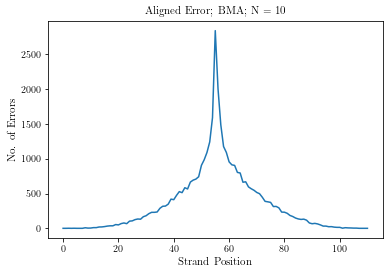

In [31]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]

for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)

strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

f = plt.figure()
plt.plot(range(strand_len + 1), pos_counts)
plt.title(r'Aligned Error; BMA; N = 10', fontsize=11)
plt.xlabel(r'Strand Position', fontsize=11)
plt.ylabel(r'No. of Errors', fontsize=11)
plt.show()
f.savefig('cov10-sab-bma-aligned.pdf', bbox_inches='tight')

In [32]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [33]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

In [34]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 3, 0, 7, 6, 4, 7, 7, 9, 10, 8, 16, 17, 14, 10, 9, 26, 20, 22, 32, 27, 23, 20, 41, 42, 34, 46, 43, 43, 62, 50, 45, 65, 58, 49, 66, 60, 69, 77, 68, 84, 78, 83, 123, 116, 88, 81, 90, 76, 75, 84, 76, 75, 69, 70, 55, 46, 47, 60, 64, 50, 43, 47, 33, 50, 37, 32, 33, 28, 33, 24, 32, 24, 20, 19, 19, 15, 8, 6, 11, 8, 12, 3, 6, 4, 7, 3, 3, 4, 0, 2, 2, 3, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 3, 2, 5, 2, 7, 11, 5, 7, 10, 5, 11, 13, 9, 15, 6, 19, 17, 12, 23, 21, 21, 24, 33, 22, 26, 37, 36, 37, 45, 33, 52, 45, 51, 60, 59, 57, 82, 74, 83, 114, 116, 289, 154, 92, 80, 71, 59, 83, 60, 46, 56, 49, 49, 46, 51, 38, 33, 37, 32, 25, 25, 23, 23, 20, 19, 19, 15, 12, 13, 15, 6, 8, 12, 10, 2, 8, 4, 5, 4, 7, 2, 2, 1, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1, 2, 3, 4, 4, 3, 6, 4, 8, 7, 7, 7, 8, 15, 10, 16, 18, 19, 22, 23, 22, 17, 26, 29, 26, 30, 37, 35, 45, 34, 42, 47, 47, 60, 51, 49, 47, 51, 60, 56, 55, 74, 9

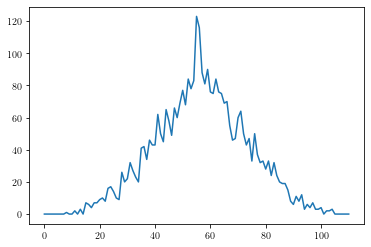

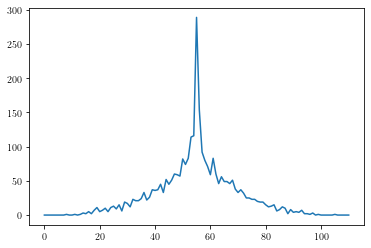

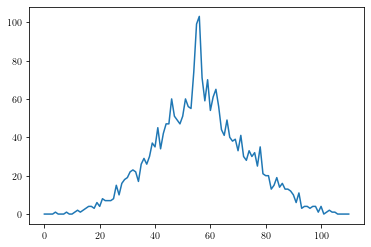

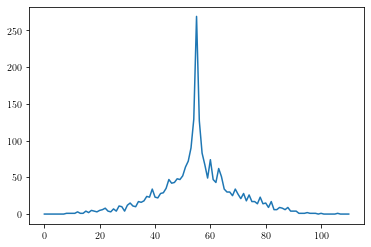

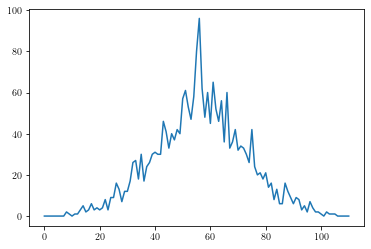

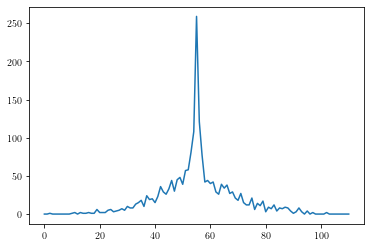

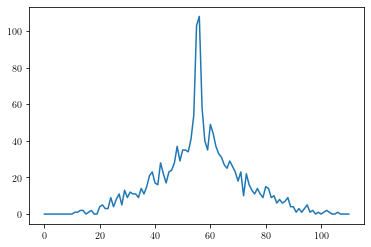

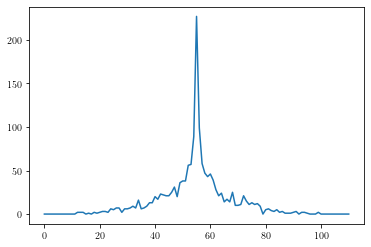

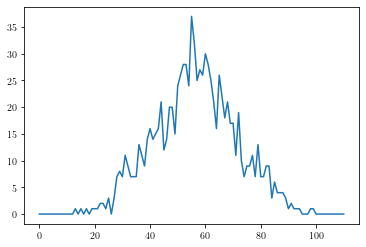

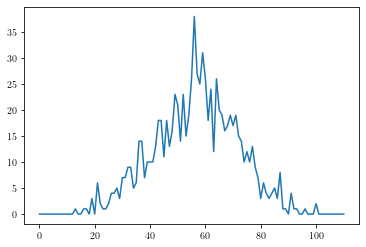

In [35]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    print(pos_map[key])
    plt.plot(range(strand_len + 1), pos_map[key])

In [36]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)